# EDA

## Noise-Less data

### EDA steps
### .     handle the missing values, null values and dublicate values
### .     check the data types and conversion
### .     check the outliers using box plot
### .     check the corelations using heatmap
### .     feature extraction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv") # Load the dataset

In [3]:
df.head(5) # Display the first few rows of the DataFrame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum() # Check for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum() # Check for duplicate values 

np.int64(0)

In [6]:
(df == '').sum() # Check for missing values in the DataFrame
(df == ' ').sum() # Check for empty string values in the DataFrame

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.dtypes # Check the data types of the columns

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.columns.to_list() # Get the list of column names

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

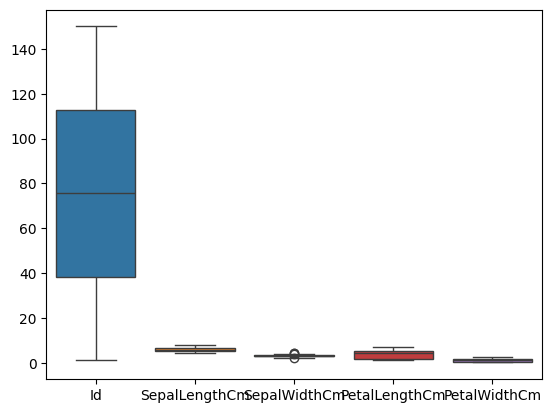

In [9]:
sns.boxplot(df)
plt.show()

In [10]:
cor = df.corr(numeric_only=True) # Calculate the correlation matrix
print(cor)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


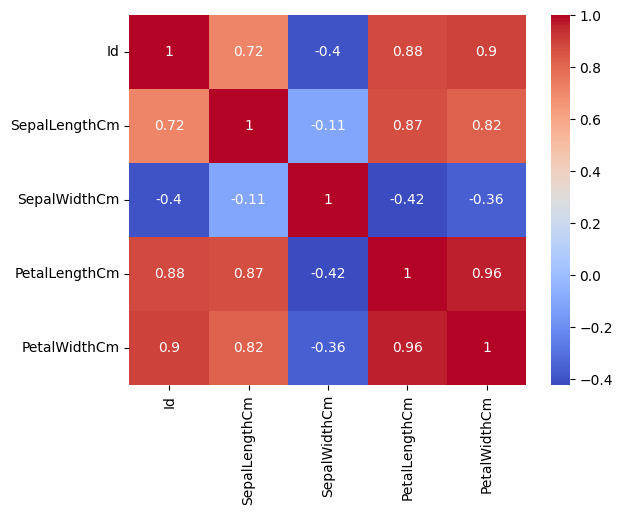

In [11]:
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

## Noisy Data

In [12]:
df2 = pd.read_csv("Iris_Noisy_Dataset.csv")

In [13]:
df2.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df2.isnull().sum() # Check for null values in the noisy dataset

sepal length (cm)    15
sepal width (cm)     15
petal length (cm)    15
petal width (cm)     15
target                0
dtype: int64

In [15]:
df2 = df2.fillna(df2.mean())

In [16]:
df2.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [17]:
df2.duplicated().sum() 

np.int64(1)

In [18]:
df2.drop_duplicates(inplace=True)            # Remove duplicate rows

In [19]:
df2.duplicated().sum() 

np.int64(0)

In [20]:
(df2 == '').sum()
(df2 == ' ').sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [21]:
df2.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

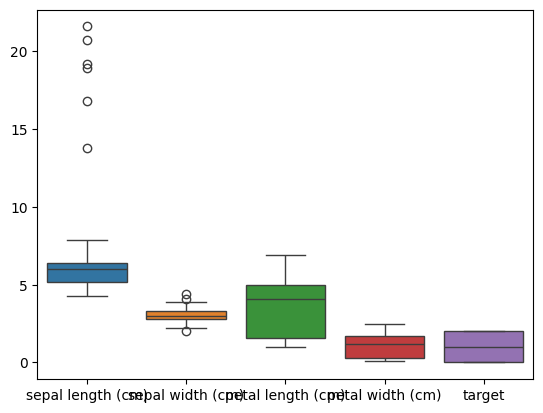

In [22]:
sns.boxplot(data = df2)
plt.show()

In [23]:
df3 = df2[df2['sepal length (cm)'] <= 10]

In [24]:
df2.shape

(149, 5)

In [25]:
df3.shape

(143, 5)

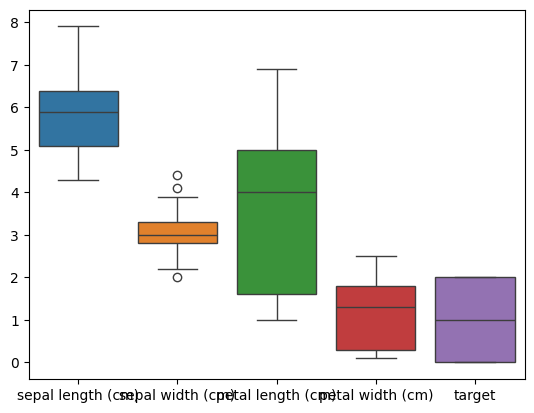

In [26]:
sns.boxplot(data = df3)
plt.show()

In [27]:
cor1 = df3.corr(numeric_only=True)
print(cor1)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.098458           0.726898   
sepal width (cm)           -0.098458          1.000000          -0.427312   
petal length (cm)           0.726898         -0.427312           1.000000   
petal width (cm)            0.711614         -0.327543           0.887988   
target                      0.681652         -0.402993           0.891501   

                   petal width (cm)    target  
sepal length (cm)          0.711614  0.681652  
sepal width (cm)          -0.327543 -0.402993  
petal length (cm)          0.887988  0.891501  
petal width (cm)           1.000000  0.864352  
target                     0.864352  1.000000  


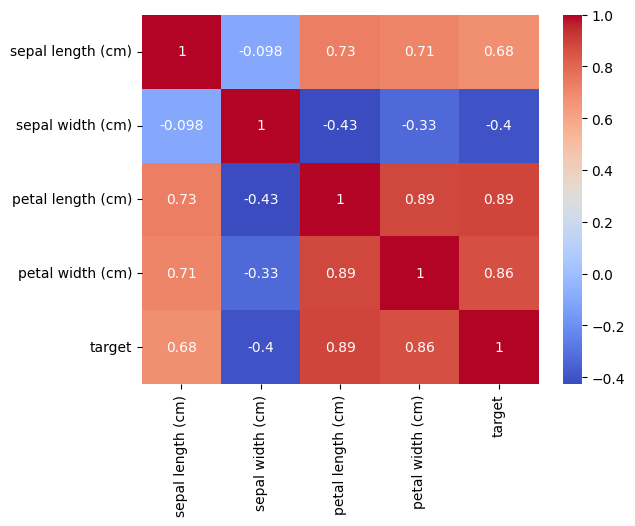

In [28]:
sns.heatmap(cor1, annot=True, cmap='coolwarm')
plt.show()

## Homework

In [29]:
df4 = pd.read_csv("AmesHousing.csv")

In [30]:
df4.shape

(2930, 82)

In [31]:
df4.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

In [32]:
df4.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [33]:
df4.tail(5) 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [34]:
df4.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [35]:
df4.isnull().sum() 

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [36]:
df4.duplicated().sum()

np.int64(0)

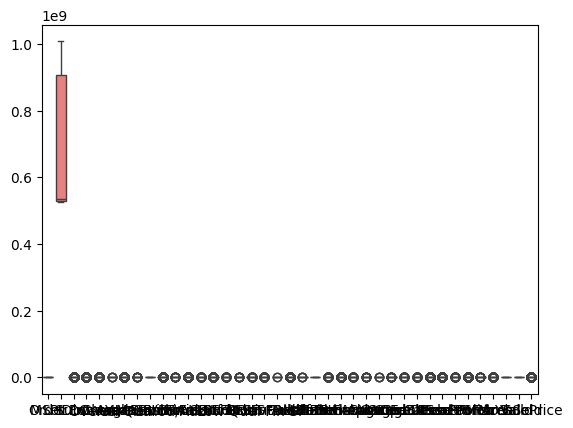

In [37]:
sns.boxplot(data = df4)
plt.show()

In [54]:
cor2 = df4.corr(numeric_only=True)
print(cor2)

                    Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.007034  0.031354   
PID              0.173593  1.000000    -0.001281     -0.096918  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.420135 -0.204613   
Lot Frontage    -0.007034 -0.096918    -0.420135      1.000000  0.491313   
Lot Area         0.031354  0.034868    -0.204613      0.491313  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.212042  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.074448 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.121562  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.091712  0.021682   
Mas Vnr Area    -0.030907 -0.229283     0.002730      0.222407  0.126830   
BsmtFin SF 1    -0.032321 -0.098375    -0.060075      0.215583  0.191555   
BsmtFin SF 2    -0.002773 -0.001145    -0.070946      0.045999  0.083150   
Bsmt Unf SF 

In [72]:
a = []
b = df4.columns.to_list()
for i in range(len(b)-1):
    c = b[i]
    if df4[c].dtype != object:
        if (cor2[c]['SalePrice'] < -0.5 or cor2[c]['SalePrice'] > 0.5):
            a.append(c)
    else:
        a.append(c)
print(len(a))

54


In [73]:
df4.shape

(2930, 82)

In [74]:
df5 = df4[a]
df5.shape

(2930, 54)

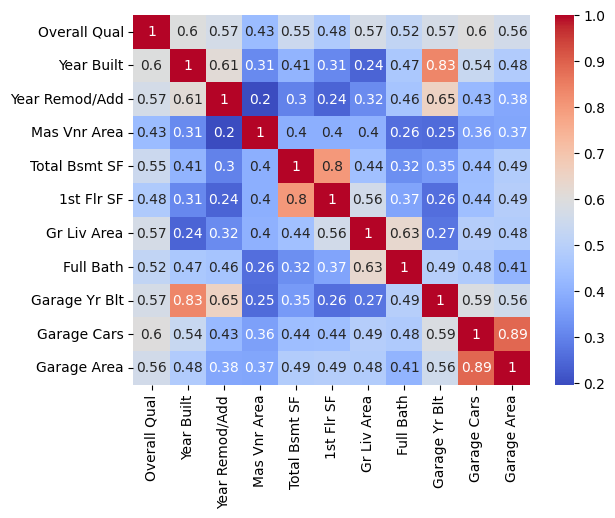

In [76]:
cor3 = df5.corr(numeric_only=True)
sns.heatmap(cor3,annot=True,cmap="coolwarm")
plt.show()